## Final Project Submission

Please fill out:
* Student name: Kanwal Arora
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Eli
* Blog post URL:


In [1]:
#!pip install tmdbsimple
#!pip install missingno
import pandas as pd 
import sqlite3 as sql 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Your code here - remember to use markdown cells for comments as well!
!ls zippedData

DataFrame1.csv            imdb.title.basics.csv     movies.csv
bom.movie_gross.csv       imdb.title.crew.csv       rt.movie_info.tsv
df_profitRatio.csv        imdb.title.principals.csv rt.reviews.tsv
imdb.name.basics.csv      imdb.title.ratings 2.csv  tmdb.movies.csv
imdb.title.akas.csv       imdb.title.ratings.csv    tn.movie_budgets.csv


In [4]:
df_movies = pd.read_csv('zippedData/movies.csv', encoding='latin-1')

In [5]:
# Getting information from movie info tsv file
df_movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,22/08/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,11/06/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,16/05/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,18/07/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,01/08/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [6]:
#Changing the index to name
df_movies.set_index('name')

,budget,company,country,director,genre,gross,rating,released,runtime,score,star,votes,writer,year
name,,,,,,,,,,,,,,
Stand by Me,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,R,22/08/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
Ferris Bueller's Day Off,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,PG-13,11/06/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
Top Gun,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,PG,16/05/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
Aliens,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,R,18/07/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
Flight of the Navigator,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,PG,01/08/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Absolutely Fabulous: The Movie,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,R,22/07/2016,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
Mothers and Daughters,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,PG-13,06/05/2016,90,4.9,Selma Blair,1959,Paige Cameron,2016
Batman: The Killing Joke,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,R,25/07/2016,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016


In [7]:
# Extracting information from IMDB Title Basics Csv File
df_movies['gross'].astype(int)
df_movies['budget'].astype(int)

0        8000000
1        6000000
2       15000000
3       18500000
4        9000000
          ...   
6815           0
6816           0
6817     3500000
6818           0
6819           0
Name: budget, Length: 6820, dtype: int64

# Lets find out average length of the movie

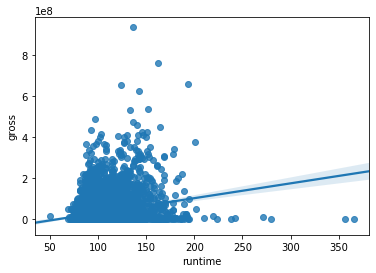

In [68]:
ax = sns.regplot(x = 'runtime',y = 'gross', data = df_movies )

In [14]:
# Find out the movie count of each genre
genre_count = pd.crosstab(index=df_movies['genre'], columns='count')

In [16]:
#There are more comedy movies than anyhting by a wide margin. 
genre_count['count'].sort_values(ascending = False)

genre
Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
Biography     359
Animation     277
Horror        277
Mystery        38
Fantasy        32
Thriller       18
Romance        15
Family         14
Sci-Fi         13
Musical         4
War             2
Western         2
Name: count, dtype: int64

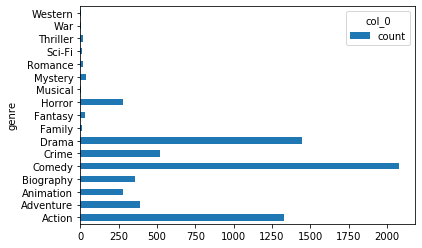

In [23]:
genre_count.plot(kind='barh');

In [29]:
# Extracting information from BOM Movie Gross Csv File
df_movies = df_movies[['genre', 'budget', 'gross', 'runtime', 'rating', 'company', 'director', 'year']] #william adams
df_movies.sort_values(by=['gross', 'budget'], ascending=False, inplace=True)

df_movies.head()

,genre,budget,gross,runtime,rating,company,director,year
6380,Action,245000000,936662225,136,PG-13,Lucasfilm,J.J. Abrams,2015
5061,Action,237000000,760507625,162,PG-13,Twentieth Century Fox Film Corporation,James Cameron,2009
2420,Drama,200000000,658672302,194,PG-13,Twentieth Century Fox Film Corporation,James Cameron,1997
6391,Action,150000000,652270625,124,PG-13,Universal Pictures,Colin Trevorrow,2015
5723,Action,220000000,623357910,143,PG-13,Marvel Studios,Joss Whedon,2012


In [32]:
Best_movies = df_movies[:200]
Best_movies

,genre,budget,gross,runtime,rating,company,director,year
6380,Action,245000000,936662225,136,PG-13,Lucasfilm,J.J. Abrams,2015
5061,Action,237000000,760507625,162,PG-13,Twentieth Century Fox Film Corporation,James Cameron,2009
2420,Drama,200000000,658672302,194,PG-13,Twentieth Century Fox Film Corporation,James Cameron,1997
6391,Action,150000000,652270625,124,PG-13,Universal Pictures,Colin Trevorrow,2015
5723,Action,220000000,623357910,143,PG-13,Marvel Studios,Joss Whedon,2012
...,...,...,...,...,...,...,...,...
4685,Animation,75000000,183135014,87,PG-13,Twentieth Century Fox Film Corporation,David Silverman,2007
3111,Comedy,70000000,182811707,127,PG-13,Paramount Pictures,Nancy Meyers,2000
3135,Action,140000000,182618434,130,PG-13,Warner Bros.,Wolfgang Petersen,2000
5758,Biography,65000000,182207973,150,PG-13,DreamWorks,Steven Spielberg,2012


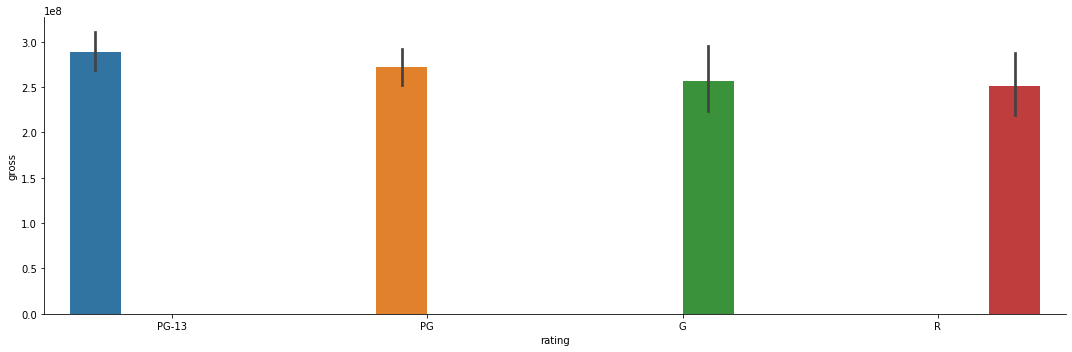

In [76]:
#graph the ratings and profit of the top 100 movies
sns.catplot(x='rating', y = 'gross', data=Best_movies, hue='rating', kind='bar', aspect=3);

In [34]:
#Check to see which directors appear the most in the top 100 movies sorted by profit.
director = pd.crosstab(index=Best_movies['director'], columns='count')
director['count'].sort_values(ascending = False).head(12)

director
Peter Jackson        7
Steven Spielberg     7
Michael Bay          6
David Yates          5
Christopher Nolan    5
Francis Lawrence     4
John Lasseter        4
Sam Raimi            4
Chris Columbus       4
George Lucas         3
Bryan Singer         3
Pete Docter          3
Name: count, dtype: int64

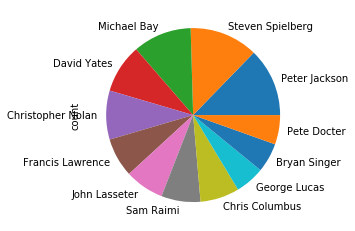

In [37]:
#make a simple graph of the above results.
director['count'].sort_values(ascending = False).head(12).plot(kind='pie')

In [38]:
# check to see who directored the highest grossing movies and print the top 10.
d_p10 = Best_movies[['director','gross']]
d_p10.head(10)

,director,gross
6380,J.J. Abrams,936662225
5061,James Cameron,760507625
2420,James Cameron,658672302
6391,Colin Trevorrow,652270625
5723,Joss Whedon,623357910
4840,Christopher Nolan,534858444
6614,Gareth Edwards,532177324
6687,Andrew Stanton,486295561
2870,George Lucas,474544677
6398,Joss Whedon,459005868


In [39]:
#Out of the top 10 movies sorted by profit, check to see if anyone appears more than once.
Best_dir = d_p10.head(10)
Best_dir['director'].value_counts(ascending=False)

Joss Whedon          2
James Cameron        2
Christopher Nolan    1
Gareth Edwards       1
George Lucas         1
J.J. Abrams          1
Andrew Stanton       1
Colin Trevorrow      1
Name: director, dtype: int64

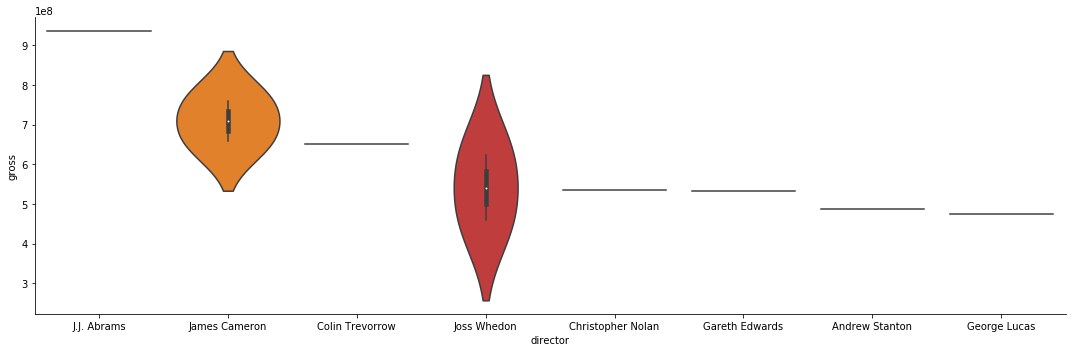

In [46]:
sns.catplot(x='director', y = 'gross', data=Best_dir , kind = 'violin', aspect = 3);

# Top 200 movies and the money they made by genre.

In [47]:
df_movies['genre'].value_counts()

Comedy       2080
Drama        1444
Action       1331
Crime         522
Adventure     392
Biography     359
Horror        277
Animation     277
Mystery        38
Fantasy        32
Thriller       18
Romance        15
Family         14
Sci-Fi         13
Musical         4
War             2
Western         2
Name: genre, dtype: int64

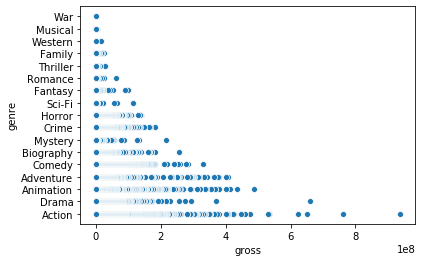

In [52]:
sns.scatterplot(x='gross', y='genre', data=df_movies);

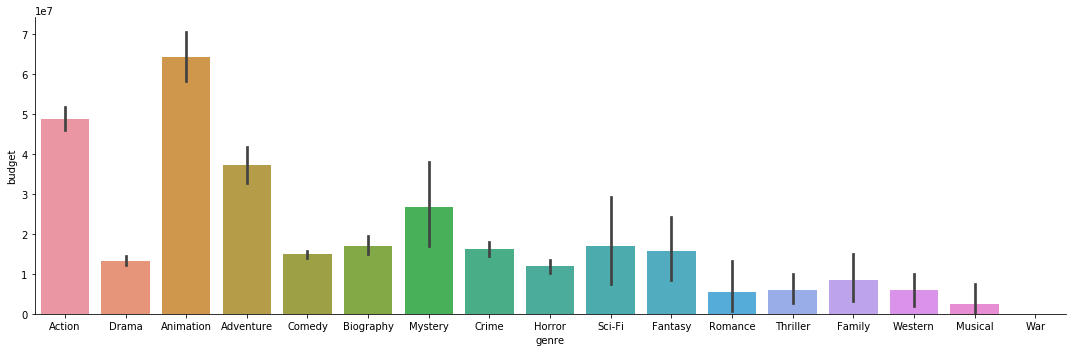

In [53]:
sns.catplot(x='genre', y='budget', data=df_movies, kind='bar', aspect=3 );

In [61]:
Top_200 = Best_movies.nlargest(200, columns='gross')

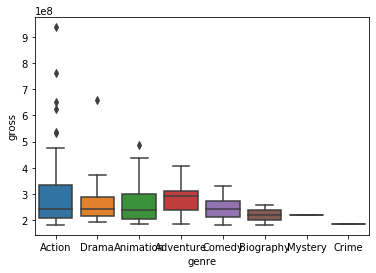

In [62]:
sns.boxplot(x='genre', y='gross', data=Top_200 );

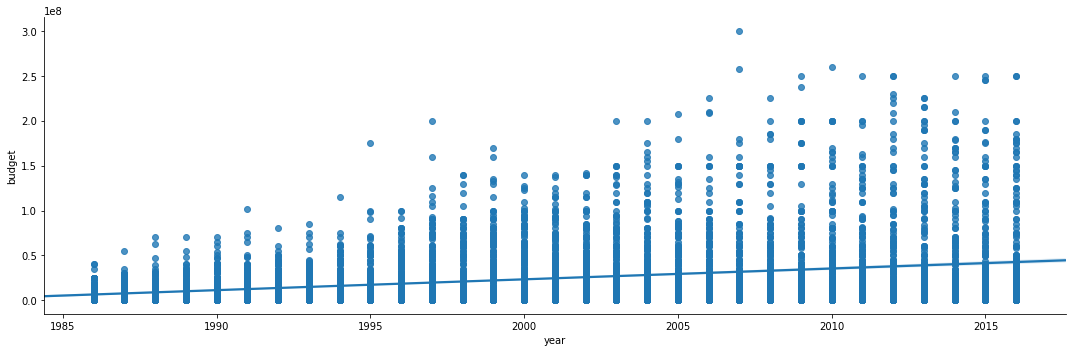

In [63]:
sns.lmplot(x='year', y='budget', data=df_movies, aspect = 3);

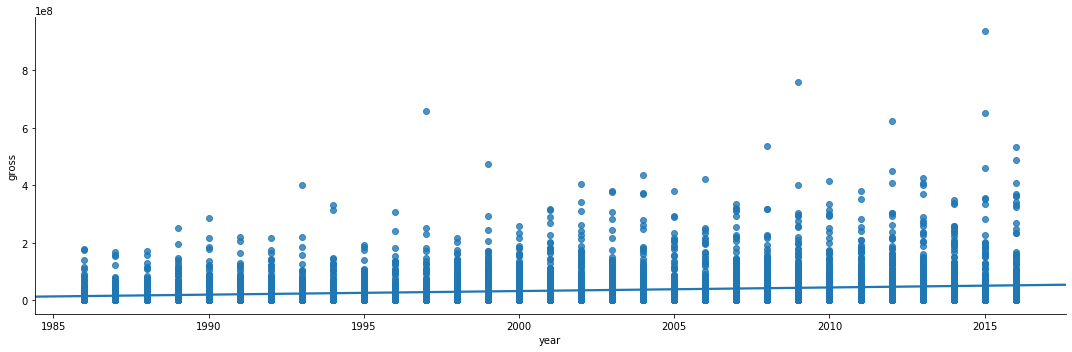

In [65]:
sns.lmplot(x='year', y='gross', data = df_movies, aspect = 3);

In [69]:
#the more money that you spend the more money you will make but you assume more risk.

# Movie Rating

In [71]:
df_movies['rating'].value_counts()

R                3392
PG-13            1995
PG                951
NOT RATED         174
G                 147
UNRATED            71
Not specified      63
NC-17              22
B                   1
TV-14               1
B15                 1
TV-MA               1
TV-PG               1
Name: rating, dtype: int64

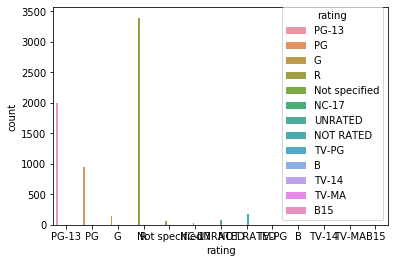

In [73]:
#there are more R rated movies than anything else
sns.countplot(x= 'rating', data=df_movies, hue='rating');

In [29]:
# Now Let's check who is in competition

In [ ]:
sns.catplot(x='company', y='gross', data=Top_100, hue='genre', kind='bar', aspect=3);

# Findings:
## Genre: Animation, Action, Adventure 

## Length: ~120 minutes

## Director: Peter Jackson 

## Rating: PG-13

## The data also suggests that the higher the budget gets over the years, so too does the profits from movies

